In [11]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [12]:
# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
minVal = np.array([0, 48, 80], dtype = "uint8")
maxVal = np.array([20, 255, 255], dtype = "uint8")

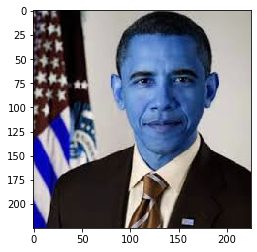

In [13]:
#plotting bgr of the test image 
img = cv2.imread('/home/oseun/Pictures/facedataset/download.jpg')
plt.imshow(img)

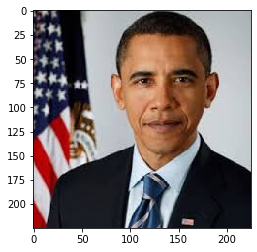

In [14]:
#plotting rgb of the test image
test_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)

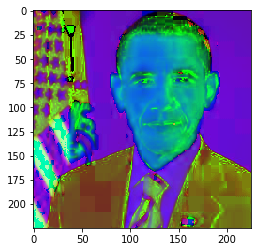

In [43]:
# convert test image to hsv
converted = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(converted)

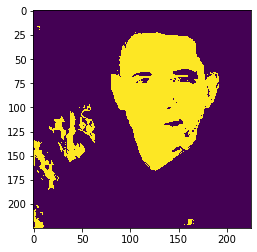

In [44]:
#  determine the HSV pixel intensities that fall into the speicifed upper and lower boundaries
#This is the main skin detection function 
skinMask = cv2.inRange(converted, minVal, maxVal)
plt.imshow(skinMask)

In [18]:
# apply a series of erosions and dilations to the mask using an elliptical kernel
#This is to remove the small false-positive skin regions in the image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

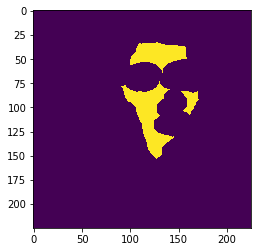

In [45]:
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
plt.imshow(skinMask)

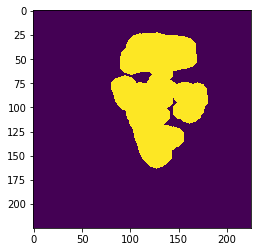

In [46]:
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
plt.imshow(skinMask)

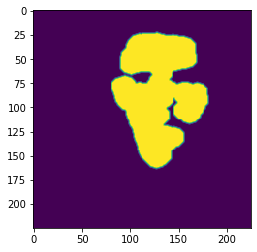

In [47]:
# blur the mask to help remove noise
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
plt.imshow(skinMask)

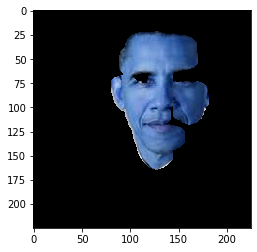

In [48]:
# then apply the mask to the frame
skin = cv2.bitwise_and(img, img, mask = skinMask)
plt.imshow(skin)

In [ ]:
# show the skin in the image along with the mask
cv2.imshow("images", np.hstack([img, skin]))
cv2.waitKey(0)
cv2.destroyAllWindows()